# **Tensors**

Everything in pytorch is based on tensor operations. A tensor is basically a multi-dim matrix with data of the same data type.

In [ ]:
import torch
import numpy as np

# print(torch.empty(1)) #gives all unitialized values, scalar of mxn dimensions
# print(torch.empty(2,3))
# print(torch.empty(2,2,3))
# print(torch.empty(2,2,2,3))

# print(torch.rand(2,3)) #dim of 2x3 having values b/w 0 and 1

# print(torch.zeros(2,3))
# print(torch.ones(2,3))

# x=torch.rand(3,3)
# print(x.size()) #or print(x.shape)
# print(x.size(0)) #or print(x.shape[0])
# print(x.dtype)
# y=torch.empty(2,2, dtype=torch.float16)
# print(y.dtype)

# l=[2,2,2]
# a=np.arange(0,101,5)
# print(torch.tensor(l)) #constructing from diff dt
# print(torch.tensor(a))
# one=torch.tensor(l)
# two=torch.tensor(a)
# print(one.dtype)
# print(two.dtype)

# print(torch.tensor([[1,2.4,3,4],[5,6.6,7,8]],requires_grad=True)) #'yes, I want to track the gradients on this tensor'
# print(torch.empty(2,3,requires_grad=True))
# print(torch.rand(2,2,requires_grad=True))

# x=torch.ones(2,2)
# y=torch.rand(2,2)
# a=x+y #or print(torch.add(x,y))
# s=x-y #or print(torch.sub(x,y))
# d=x/y #or print(torch.mul(x,y))
# m=x*y #or print(torch.div(x,y))
# print(a,s,d,m)

# x=torch.rand(2,2)
# print(x)
# print(x[:,0]) #all rows, 0th column
# print(x[1,:]) #all columns, 1st row
# print(x[1,1]) #1st row, 1st column instead of x.size(number)
# print(x[1,1].item())

# x=torch.rand(4,4)
# print(x.view(8,2))
# print(x.view(16,1))
# print(x.view(-1,8))
# y=x.view(-1,8) #automatically corrected to (2,8)
# print(y.shape)

# a=torch.ones(5) #torch to numpy
# print(a,a.dtype)
# b=np.array(a)
# print(b,b.dtype)
# a.add_(1)
# print(a,b) #if tensor is on the cpu then both a and b share the same memory location

# a=np.array([1,2,3,4,5])
# print(a.dtype)
# b=torch.from_numpy(a)
# print(b.dtype)
# c=torch.tensor(a)
# print(c.dtype)
# a+=1 #b will change as same mem loc as a but c is a diff copy, so it wont change
# print(a,b,c)

# torch.device('cuda' if torch.cuda.is_available else 'cpu') #if more than one gpt, then cuda:0 so on
# x=torch.rand(2,2)
# x=x.to("cpu")
# x=x.to("cuda")

# **Autograd**

This package provides automatic differentiation for all operations on tensors. Vector-Jacobian product calculated. Set ```requires_grad=True```.

In [ ]:
import torch

# x=torch.rand(3,1,requires_grad=True)
# y=x+2
# print(x)
# print(y) #has grad_fn used in backward propagation
# print(y.grad_fn)

# x=torch.rand(2,2,requires_grad=True)
# y=x+2
# z=y*y*3
# print(z)
# z=z.mean()
# print(z)
# print(x.grad) #none
# z.backward() #used to calc all the gradients, backpropagation->fwd passing, calc grad, bckwd passing
# print(x.grad) #doz/dox
# optimizer.zero_grad() #this line wont run but the purpose is basically to show that its an essential habit to empty the gradient after every iteration, while running epochs in for loop

# a=torch.rand(2,2) #way 1 to have no autograd (false)
# b=(a*a).sum()
# print(a.requires_grad) #false
# print(b.grad_fn) #none
# a=torch.rand(2,2,requires_grad=True);print("\n") #way 2 to have no autograd (false)
# b=(a*a).sum()
# b=a.detach()
# print(a.requires_grad)
# print(b.requires_grad)
# a=torch.rand(2,2,requires_grad=True);print("\n") #way 3 to have no autograd (false)
# print(a.requires_grad)
# with torch.no_grad():
#   b=(a*a).sum()
#   print(b.requires_grad)

# **Linear regression autograd**

An example for linear regression would be: `f(x) = w * x + b` and in this case, `f(x) = 2 * x`

In [ ]:
import torch
import numpy as np

# a=np.arange(1,9,dtype=np.float32)
# b=2*a
# X=torch.tensor(a)
# Y=torch.tensor(b)
# w=torch.tensor(0.0,dtype=torch.float32,requires_grad=True) #weights, needed later on for calc grads
# def fwdp(x):
#   return w*x
# def loss(y,y_pred):
#   return((y_pred-y)**2).mean()
# # print(f"Prediction before training: f({5})={fwdp(5)}")

# learning_rate=0.01 #training phase
# n_epochs=100
# for epoch in range(n_epochs):
#   y_pred=fwdp(X)
#   l=loss(Y,y_pred)
#   l.backward() #gradient by backtracking
#   with torch.no_grad():
#     w-=learning_rate*w.grad #weight reduced
#   w.grad.zero_()
#   if (epoch+1)%10==0:
#     print(f"epoch{epoch+1}: w={w.item()} , loss={l.item()}") #weight and loss for that epoch
# print(f"Prediction after training: f({5})={fwdp(5).item()}")

# **Model, loss and optimizer**

A typical PyTorch pipeline looks like this:  
1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  * Forward = compute prediction and loss
  * Backward = computer gradients
  * Update weights



In [ ]:
import torch
import torch.nn as nn

# X=torch.tensor([[x] for x in range(1,9)],dtype=torch.float32)
# Y=2*X
# s,f=X.shape #samples and features->rows and columns
# X_test=torch.tensor([5],dtype=torch.float32)
# class LinearRegression(nn.Module): #design model
#   def __init__(self,input_dim,output_dim):
#     super(LinearRegression,self).__init__()
#     self.lin=nn.Linear(input_dim,output_dim)
#   def forward(self,x):
#     return self.lin(x)
# ins,ous=f,f
# model=LinearRegression(ins,ous)
# print(f"Prediction before training: f({X_test.item()})={model(X_test).item()}")
# learning_rate=0.01 #loss and optimizer
# n_epochs=100
# loss=nn.MSELoss()
# optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
# for epoch in range(n_epochs): #training loop
#   y_predicted=model(X) #fwd pass
#   l=loss(Y,y_predicted) #loss
#   l.backward() #bkwd pass
#   optimizer.step() #update weights
#   optimizer.zero_grad() #zero up the grad
#   if (epoch+1)%10==0:
#     w,b=model.parameters()
#     print(f"epoch {epoch+1}: w={w[0][0].item()}, loss={l.item()}")
# print(f"Prediction after training: f({X_test.item()})={model(X_test).item()}")


# **Neural network**

GPU, datasets, dataloader, transforms, neural net, training and evaluation.

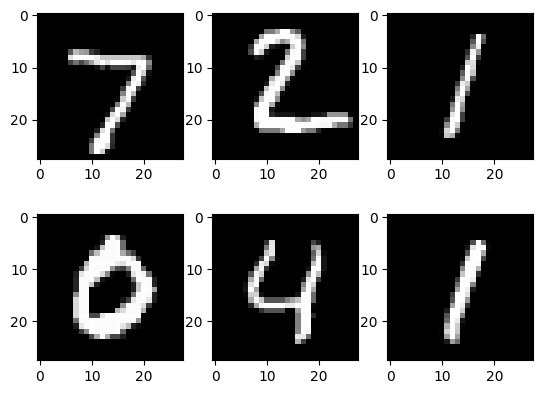

Epoch [1/50], Step [100/600], Loss: 0.2585301399230957
Epoch [1/50], Step [200/600], Loss: 0.31952258944511414
Epoch [1/50], Step [300/600], Loss: 0.19561511278152466
Epoch [1/50], Step [400/600], Loss: 0.24507740139961243
Epoch [1/50], Step [500/600], Loss: 0.11186674982309341
Epoch [1/50], Step [600/600], Loss: 0.048989586532115936
Epoch [2/50], Step [100/600], Loss: 0.16906669735908508
Epoch [2/50], Step [200/600], Loss: 0.07352155447006226
Epoch [2/50], Step [300/600], Loss: 0.1653602421283722
Epoch [2/50], Step [400/600], Loss: 0.12219783663749695
Epoch [2/50], Step [500/600], Loss: 0.06643558293581009
Epoch [2/50], Step [600/600], Loss: 0.1431734561920166
Epoch [3/50], Step [100/600], Loss: 0.0728316530585289
Epoch [3/50], Step [200/600], Loss: 0.034963302314281464
Epoch [3/50], Step [300/600], Loss: 0.05820370838046074
Epoch [3/50], Step [400/600], Loss: 0.028171377256512642
Epoch [3/50], Step [500/600], Loss: 0.0521940179169178
Epoch [3/50], Step [600/600], Loss: 0.099314011633

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device=torch.device('cuda' if torch.cuda.is_available else 'cpu') #device config
# inp_size=784 #hyper parameters
# hidd_size=500
# num_classes=10
# num_epochs=50
# batch_size=100
# lear_rate=0.001
# train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True) #MNIST dataset
# test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
# train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True) #shuffle true as avoids pattern memorization
# test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False) #while testing, want to check efficiency
# ex_data, ex_targets = next(iter(test_loader)) #batch input data and target data
# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(ex_data[i][0],cmap='gray')
# plt.show()
# class NeuralNetwork(nn.Module): #design model
#   def __init__(self,input_size,hidden_size,num_classes):
#     super(NeuralNetwork,self).__init__()
#     self.l1=nn.Linear(input_size,hidden_size)
#     self.relu=nn.ReLU()
#     self.l2=nn.Linear(hidden_size,num_classes)
#   def forward(self,x):
#     out=self.l1(x)
#     out=self.relu(out)
#     out=self.l2(out) #no activation and softmax at the end as crossentropyloss needs raw value
#     return out
# model=NeuralNetwork(inp_size,hidd_size,num_classes).to(device)
# criterion=nn.CrossEntropyLoss() #loss and optimizer
# optimizer=torch.optim.Adam(model.parameters(),lr=lear_rate)
# ntotsteps=len(train_loader) #training loop
# for epoch in range(num_epochs):
#   for i, (images,labels) in enumerate(train_loader):
#     images=images.reshape(-1,28*28).to(device)
#     labels=labels.to(device)
#     outputs=model(images)
#     loss=criterion(outputs,labels)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#     if (i+1)%100==0:
#       print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{ntotsteps}], Loss: {loss.item()}")

In [ ]:
# with torch.no_grad(): #testing the model, no need to compute gradient
#   ncorr=0
#   nsamples=len(test_loader.dataset)
#   for images,labels in test_loader:
#     images=images.reshape(-1,28*28).to(device) #helps to flatten it into a 1D tensor
#     labels=labels.to(device)
#     outputs=model(images) #feed the model images
#     _,predicted=torch.max(outputs,1) #here, torch.max finds the max value within the tensor and outputs is feeding the tensor from which we want to find the max element which is assigned to placeholder "_" and thus the second argument 1 is basically that we want to find max value among the column and thats assigned to predicted
#     ncorr+=(predicted==labels).sum().item() #when the predicted value matches the label corresponding to the image, its counted as a correct prediction and these correct predictions are summed up
#   accuracy=ncorr/nsamples
#   print(f"Accuracy of network on {nsamples} test images: {100*accuracy}%")

Accuracy of network on 10000 test images: 98.36%


# **Convolutional neural network**

Convolutional layers, maxpooling, save and load model. Also, CIFAR10 dataset used, which is a collection of 60000, 32x32 color images in 10 classes, with 6000 images per class.

100%|██████████| 170498071/170498071 [00:01<00:00, 89897756.52it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


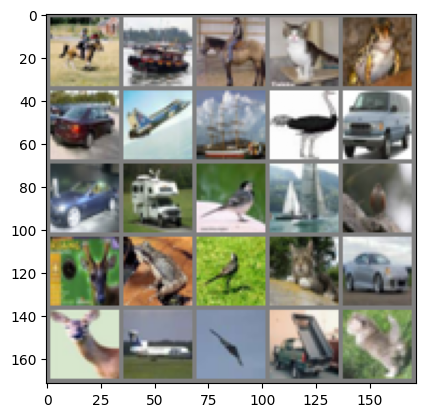

[1], loss: 1.4609039157762485
[2], loss: 1.070362997184712
[3], loss: 0.9090686608832842
[4], loss: 0.8083810013071208
[5], loss: 0.735389190954195
[6], loss: 0.6779808996963868
[7], loss: 0.6294659163352395
[8], loss: 0.5806318837350862
[9], loss: 0.543494567718364
[10], loss: 0.5018767913945272


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck') #needed for CIRAF10
# device=torch.device('cuda' if torch.cuda.is_available() else 'cpu') #device
# nepochs=10 #hyperparameters
# batch_size=32
# lear_rate=0.001
# transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) #normalize to get it in the range [-1,1] and the 1st (0.5,...) is for mean and second one for standard deviation, to normalize all the 3 color channels
# train_dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
# test_dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
# train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
# test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)
# def imshow(imgs):
#   imgs=imgs/2 + 0.5 #unnormalize
#   npimgs=imgs.numpy()
#   plt.imshow(np.transpose(npimgs,(1,2,0))) #transposed from (batch_size, channels, height, width) to (height, width, channels)
#   plt.show()
# images,labels=next(iter(train_loader))
# imggrid=torchvision.utils.make_grid(images[0:25],nrow=5) #first 25 images taken and 5 rows
# imshow(imggrid)
# class CNN(nn.Module): #build model
#   def __init__(self):
#     super().__init__()
#     self.conv1=nn.Conv2d(3,32,3) #output size of this, that is 32.... #1st 3 is because RGB and second 3 is because kernel size
#     self.pool=nn.MaxPool2d(2,2) #lets say ()()()() are 4 quadrants, then () has 4 [][][][] images and similar the other three () and maxpooling basically is choosing the max [] out of that () and will thus reduce 16x16 to 4x4
#     self.conv2=nn.Conv2d(32,64,3) #....should match input size of this, that is 32
#     self.conv3=nn.Conv2d(64,64,3)
#     self.fc1=nn.Linear(64*4*4,64)
#     self.fc2=nn.Linear(64,10)
#   def forward(self,x): #N,3,32,32
#     x=F.relu(self.conv1(x)) #N,32,30,30
#     x=self.pool(x) #N,32,15,15
#     x=F.relu(self.conv2(x)) #N,64,13,13
#     x=self.pool(x) #N,64,6,6
#     x=F.relu(self.conv3(x)) #N,64,4,4
#     x=torch.flatten(x,1) #N,1024
#     x=F.relu(self.fc1(x)) #N,64
#     x=self.fc2(x) #N,10
#     return x
# model=CNN().to(device)
# criterion=nn.CrossEntropyLoss() #loss and optimizer
# optimizer=torch.optim.Adam(model.parameters(),lr=lear_rate)
# ntotsteps=len(train_loader)
# for epoch in range(nepochs): #training loop
#   runloss=0.0
#   for i, (images,labels) in enumerate(train_loader):
#     images=images.to(device)
#     labels=labels.to(device)
#     outputs=model(images) #fwd pass
#     loss=criterion(outputs,labels) #loss
#     loss.backward() #bckwd pass
#     optimizer.step() #update weights
#     optimizer.zero_grad() #reset
#     runloss+=loss.item()
#   print(f"[{epoch+1}], loss: {runloss/ntotsteps}")
# PATH='./cnn.pth' #current directory, cnn.pth file created
# torch.save(model.state_dict(),PATH) #here, model could be saved as it is but instead dictionary of state values are better

In [3]:
# lmodel=CNN()
# lmodel.load_state_dict(torch.load(PATH)) #takes the loaded dictionary
# lmodel.to(device)
# lmodel.eval() #helps when model is not trained
# with torch.no_grad(): #while training, no gradient calc needed
#   ncorr1=0
#   ncorr2=0
#   nsamples=len(test_loader.dataset)
#   for images,labels in test_loader:
#     images=images.to(device)
#     labels=labels.to(device)
#     outputs=model(images) #model from the previous code snippet
#     _,predicted=torch.max(outputs,1)
#     ncorr1+=(predicted==labels).sum().item()
#     outputs2=lmodel(images) #model based on the output from the previous code snippet
#     _,predicted2=torch.max(outputs2,1)
#     ncorr2+=(predicted==labels).sum().item()
#   acc1=100.0*ncorr1/nsamples
#   acc2=100.0*ncorr2/nsamples
#   print(f"Accuracy of model is {acc1}% and accuracy of loaded model is {acc2}%.")

Accuracy of model is 73.0% and accuracy of loaded model is 73.0%.
